In this code we will clean a noisy signal by using Fast Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size' : 18})

In [7]:
dt = 0.001
t = np.arange(0,1,dt)

# Sum of two frequencies sine waves
f = 2* np.sin(2*np.pi*120*t) + 2* np.sin(2*np.pi*50*t)
f_clean = f

# Adding Noise to the signal
f = f + 2.5* np.random.randn(len(t))

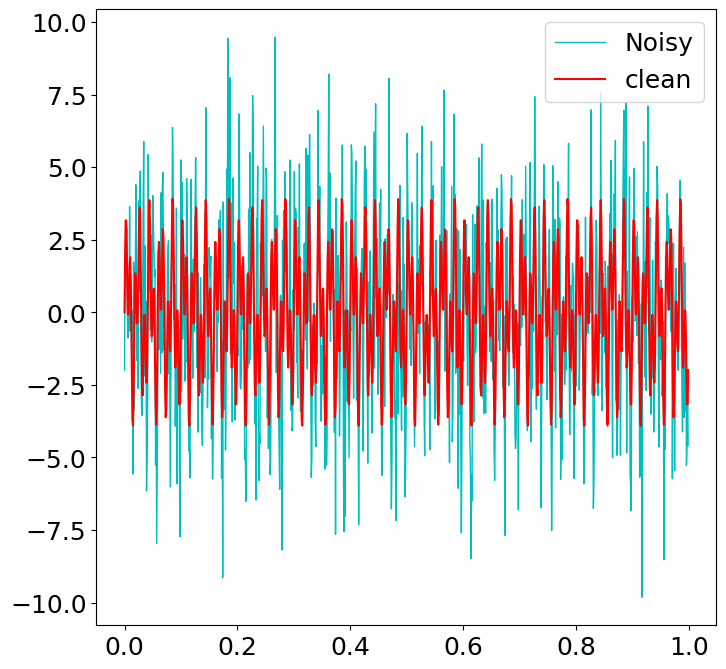

In [17]:
plt.plot(t,f, color = 'c', linewidth = '1', label = 'Noisy')
plt.plot(t, f_clean, color = 'r', linewidth = '1.5', label = 'clean')
# plt.xlim(t[0], t[-1])
# plt.xlim(0,0.5)
plt.legend()



In [19]:
# Computing FFT

n = len(t)
fhat = np.fft.fft(f, n)


The power spectrum of a signal indicates the relative magnitudes of the frequency components that combine to make up the signal. 

d:\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


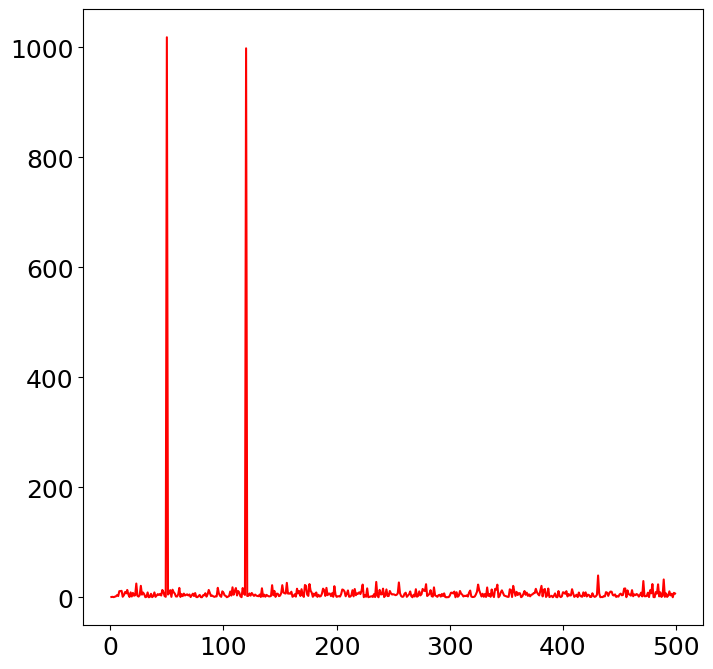

In [35]:
# Power spectrum (power per freq)
PSD = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')
# plt.xlim(0,0.5)
plt.plot(freq[L], PSD[L], color = 'r', linewidth = '1.5')

# Here x axis is freq and y axis tells how much power each of that freq contains
# In this example we can see that most of the power is concentrated at freq = 50Hz and 100Hz

Now We will neglect all those fourier coefficients for which power values are very less so that we can filter out f

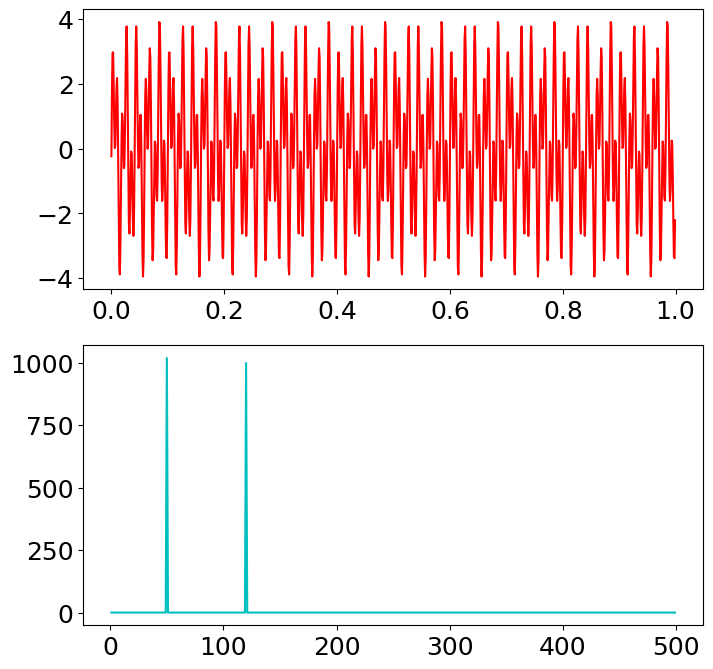

In [41]:
# Find all freqs with large power
indices = PSD > 100 # Creating a vector indices which has value = 1 where PSD>100 and everywhere else it is 0
PSD_clean = indices * PSD
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)
plt.subplot(2,1,1)
plt.plot(t, ffilt, color = 'r')
plt.subplot(2,1,2)
plt.plot(freq[L], PSD_clean[L], color = 'c' )
